In [1]:
file = TFile::Open("recodata.root");
file->ls();

TNetXNGFile**		root://eoshome-i01.cern.ch//eos/user/a/agautam/SWAN_projects/INFN/Old_test_23_sinle_run_no_gas/recodata.root	
 TNetXNGFile*		root://eoshome-i01.cern.ch//eos/user/a/agautam/SWAN_projects/INFN/Old_test_23_sinle_run_no_gas/recodata.root	
  KEY: TTree	recodata;1	recodata


In [2]:
recodata->Print();

******************************************************************************
*Tree    :recodata  : recodata                                               *
*Entries :    14567 : Total =         2410867 bytes  File  Size =     795050 *
*        :          : Tree compression factor =   3.03                       *
******************************************************************************
*Br    0 :n         : n/s                                                    *
*Entries :    14567 : Total  Size=      29671 bytes  File Size  =      10766 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.71     *
*............................................................................*
*Br    1 :x         : x[n]/F                                                 *
*Entries :    14567 : Total  Size=     793672 bytes  File Size  =     288069 *
*Baskets :       27 : Basket Size=      32000 bytes  Compression=   2.75     *
*...................................................

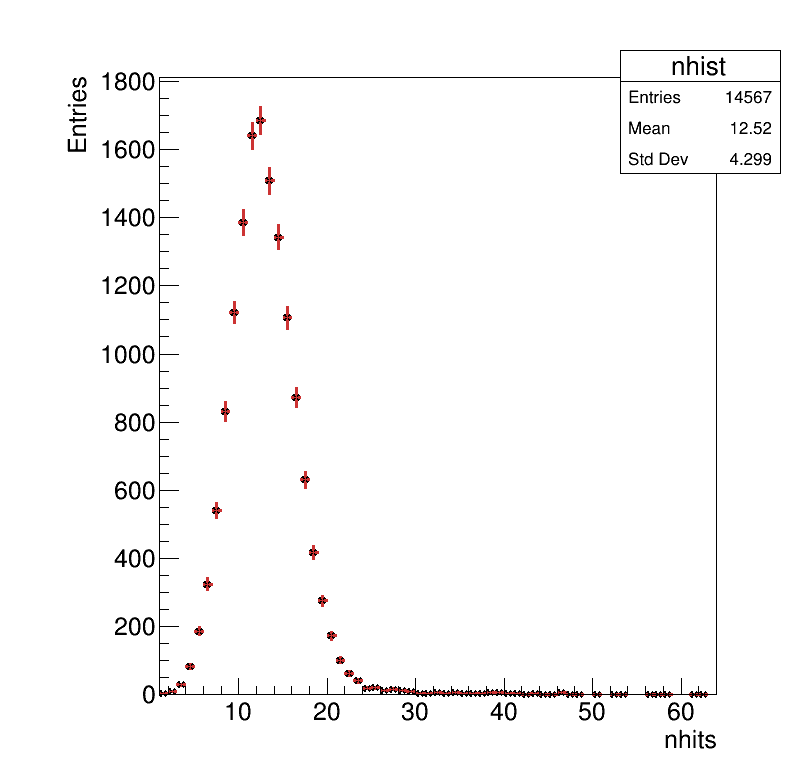

In [3]:
TCanvas *can = new TCanvas("can","",800,800);
float nmax= 90;
float nmin =0;
float nbin = 100;
TH1D *nhist = new TH1D("nhist", ";nhits;Entries",nbin,nmax,nmin );
nhist->SetLineColor(kRed-3);
nhist->SetLineWidth(3);
nhist->SetMarkerStyle(41);
//nhist->GetYaxis()->SetOffSet(3);
can->cd();

recodata->Draw("n>>nhist","","e");
can->SetLeftMargin(0.2);
can->Draw("");

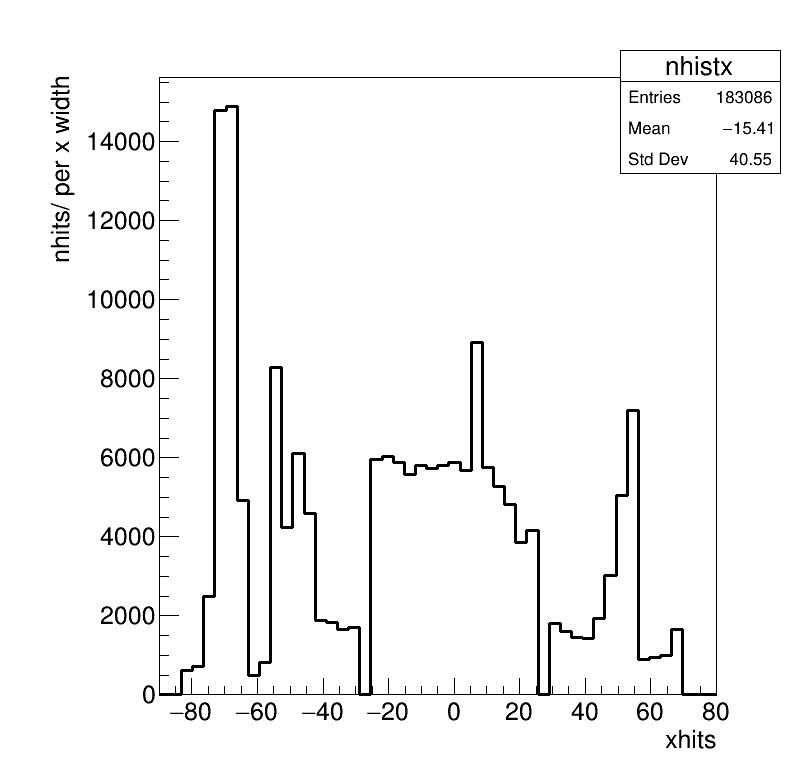

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


In [4]:
TCanvas *can = new TCanvas("can","",800,800);
float xmax= 100;
float xmin =-100;
float ymax= 80;
float ymin =-0;

float nbinx = 50;
float nbiny = 50;
//nhistx->GetXaxis()->GetXmin(), nhistx->GetXaxis()->GetXmax(),nhistx->GetYaxis()->GetXmin(), nhistx->GetYaxis()->GetXmax(), 3);
TH1D *nhistx = new TH1D("nhistx", ";xhits;nhits/ per x width",nbinx,xmax,xmin);
nhistx->SetLineColor(kBlack-3);
nhistx->SetLineWidth(3);
nhistx->SetMarkerStyle(41);

can->cd();
can->SetLeftMargin(0.2);

recodata->Draw("x>>nhistx","" ,"");

//TF2 *circ = new TF2("circ", "x*x +y*y-[0]*[0]", -100,100,-80,80 );
//circ->SetParameters(20);

//nhistxy->Fit("circ");

can->Draw("");

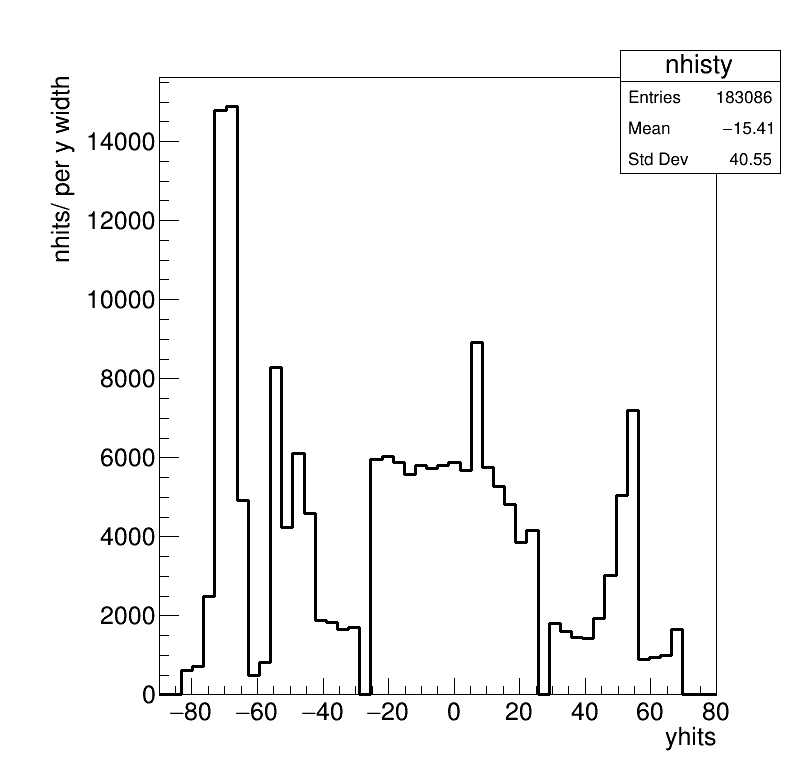

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


In [5]:
TCanvas *can = new TCanvas("can","",800,800);
float ymax= 80;
float ymin =-80;


float nbiny = 50;
//nhistx->GetXaxis()->GetXmin(), nhistx->GetXaxis()->GetXmax(),nhistx->GetYaxis()->GetXmin(), nhistx->GetYaxis()->GetXmax(), 3);
TH1D *nhisty = new TH1D("nhisty", ";yhits;nhits/ per y width",nbiny,ymax,ymin);
nhisty->SetLineColor(kBlack-3);
nhisty->SetLineWidth(3);
nhisty->SetMarkerStyle(41);

can->cd();
can->SetLeftMargin(0.2);

recodata->Draw("x>>nhisty","" ,"");

//TF2 *circ = new TF2("circ", "x*x +y*y-[0]*[0]", -100,100,-80,80 );
//circ->SetParameters(20);

//nhistxy->Fit("circ");

can->Draw("");

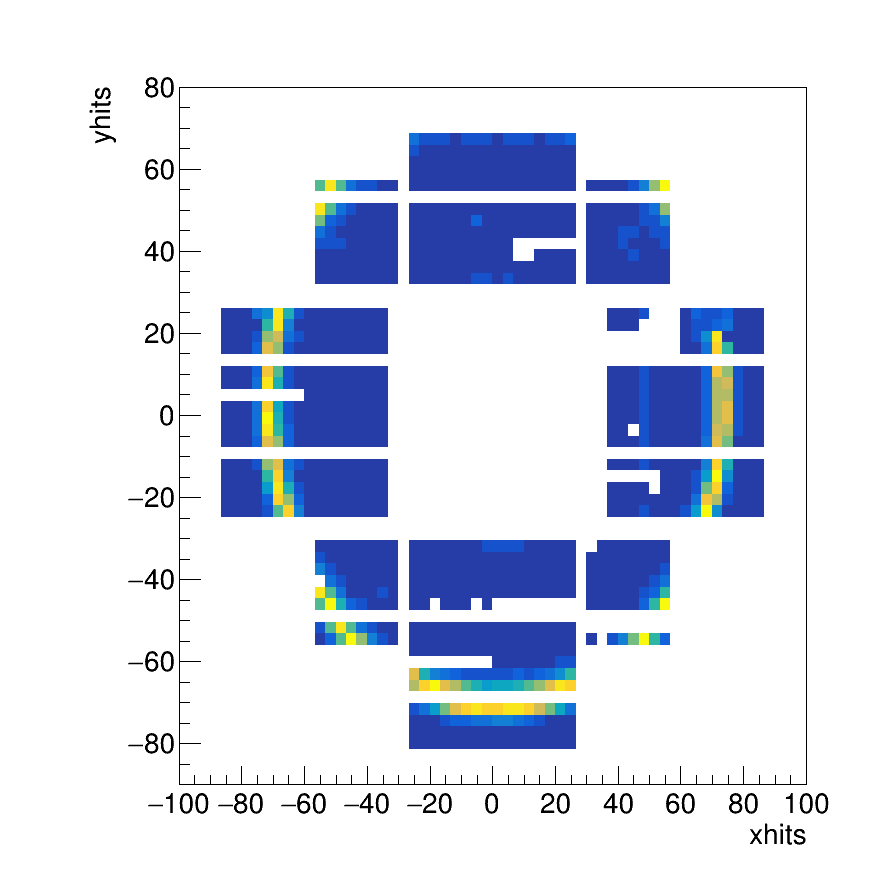

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


In [6]:
TCanvas *can = new TCanvas("can","",900,900);
float xmax= 100;
float xmin =-100;
float ymax= 100;
float ymin =-100;

int nbinx = 60;
int nbiny = 60;
TH2D *nhistxy = new TH2D("nhistxy", ";xhits;yhits",nbinx,xmax,xmin,nbiny,ymax,ymin);



//TF2 *circ = new TF2("circ", "(x-[0])**2 +(y-[1])**2 -[2]**2", nhistxy->GetXaxis()->GetXmin(),nhistxy->GetXaxis()->GetXmax(),nhistxy->GetYaxis()->GetXmin(),nhistxy->GetYaxis()->GetXmax());
//circ->SetParameters(0,0,(nhistxy->GetXaxis()->GetXmax())/2);
//circ->SetParLimits(2,30,34);


nhistxy->GetYaxis()->SetRangeUser(ymin,ymax);
nhistxy->SetStats(0);
can->cd();

recodata->Draw("x:y>>nhistxy","" ,"col");

can->SetLeftMargin(0.2);
can->Draw();

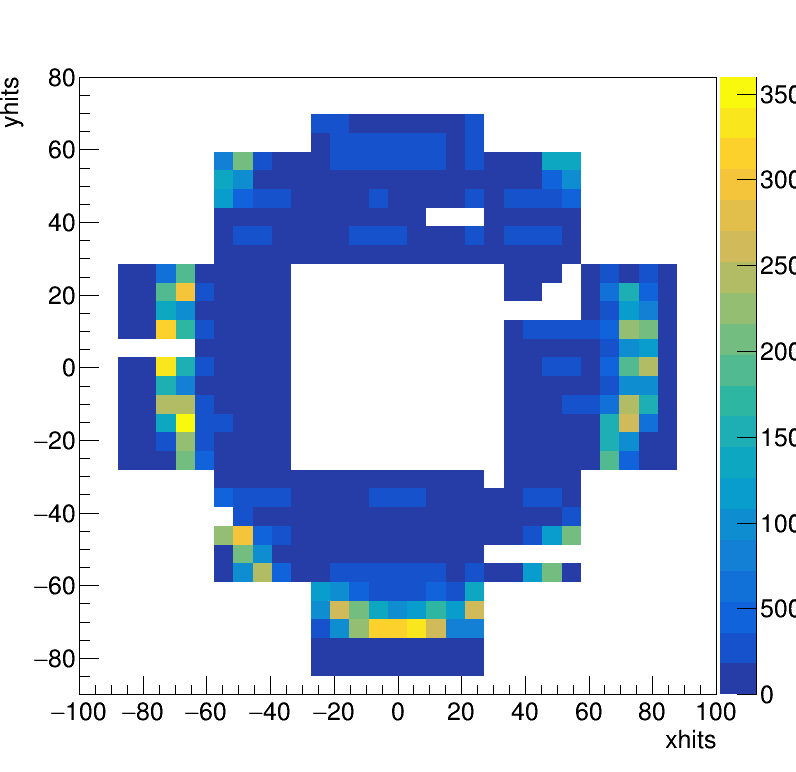

Unknown function: circ


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Warning in <TNetXNGFile::Append>: Replacing existing TH1: nhistxy (Potential memory leak).
Error in <TF1::TF1>: function: circle/[3]*((x-[0])**2 +(y-[1])**2 -[2]**2) has dimension 2 instead of 1


In [7]:
TCanvas *can = new TCanvas("can","",800,800);
float xmax= 100;
float xmin =-100;
float ymax= 100;
float ymin =-100;

int nbinx = 33;
int nbiny = 33;
TH2D *nhistxy = new TH2D("nhistxy", ";xhits;yhits",nbinx,xmax,xmin,nbiny,ymax,ymin);



TF2 *circle = new TF2("circle", "[3]*((x-[0])**2 +(y-[1])**2 -[2]**2)", nhistxy->GetXaxis()->GetXmin(),nhistxy->GetXaxis()->GetXmax(),nhistxy->GetYaxis()->GetXmin(),nhistxy->GetYaxis()->GetXmax());
circle->SetParameters(0,0,(nhistxy->GetXaxis()->GetXmax())/2,3);
circle->SetParLimits(2,40,43);


nhistxy->GetYaxis()->SetRangeUser(ymin,ymax);
nhistxy->SetStats(0);
can->cd();

recodata->Draw("x:y>>nhistxy","" ,"colz");

nhistxy->Fit("circ","N");

//TElliplse *elp = new TEllipse("elp",circ->GetParameter(0),circ->GetParameter(1),circ->GetParameter(2),circ->GetParameter(2));
//TArc *arc = new 3A*rc(circ->GetParameter(3)*circ->GetParameter(0),circ->GetParameter(1),circ->GetParameter(2));
//arc->SetFillColorAlpha(kBlue, 0.1);
//circ->Draw("SAME");
//arc->Draw("SAME");
can->Draw("");

In [ ]:
TFile* file = TFile::Open("recodata.root");
    //creating tree
    TTree * tree = (TTree*) file->Get("recodata");
    //init branches
    float x[60000];
    float y[60000];
    float t[60000];
    UShort_t n;
    // set branch address
    TGraphErrors* gr = new TGraphErrors();
    tree->SetBranchAddress("x",&x);
    tree->SetBranchAddress("y",&y);
    tree->SetBranchAddress("t",&t);
    tree->SetBranchAddress("n",&n);
    //tree entry loop
  
     
     gr->SetMarkerColor(2);
     gr->SetMarkerSize(2);
     gr->SetMarkerStyle(20);


    // cout<< "number of entries are " << tree->GetEntries()<< endl; 
     for(int i =0; i <tree->GetEntries(); i++){
         tree->GetEntry(i);
         //per entry hits loop
         for (int k =0 ; k< n ; k++){
           gr->SetPoint(k,x[k],y[k]);
           gr->SetPointError(k,1.5,1.5);  
         }
         
    } 



auto chi2Function = [&](const double *par) {
      //minimisation function computing the sum of squares of residuals
      // looping at the graph points
      int np = gr->GetN();
    //  cout<< np<< endl;
      double f = 0;
      double *x = gr->GetX();
      double *y = gr->GetY();
      double *ex = gr->GetEX();
      double *ey = gr->GetEY();
      for (int i=0;i<np;i++) {
         double u = x[i] - par[0];
         double v = y[i] - par[1];
         if( (u ==0 ) || (v==0) )continue;
         double dr = par[2] - std::sqrt(u*u+v*v);
         double err2 = ((u*u)*(ex[i]*ex[i]) + (v*v)*(ey[i]*ey[i]))/(u*u+v*v);
         //cout << err2<< endl;
         f += dr*dr/err2;
         //cout <<f<< endl;
      }
      return f;
   };

ROOT::Math::Functor fcn(chi2Function,3);
ROOT::Math::MinimizerOptions::SetDefaultMaxFunctionCalls(100000);
//ROOT::Math::MinimizerOptions::SetPrintLevel(2)
//ROOT::Math::Minimizer::MaxFunctionCalls(1000);
   ROOT::Fit::Fitter  fitter;
  
   double pStart[3] = {1,0,0};
   fitter.SetFCN(fcn, pStart);
   fitter.Config().ParSettings(0).SetName("x0");
   fitter.Config().ParSettings(1).SetName("y0");
   fitter.Config().ParSettings(2).SetName("R");
   // do the fit 
   bool ok = fitter.FitFCN();
   if (!ok) {
      Error("line3Dfit","Line3D Fit failed");
   }   
   const ROOT::Fit::FitResult & result = fitter.Result();
   result.Print(std::cout);
   //Draw the circle on top of the points
   TArc *arc = new TArc(result.Parameter(0),result.Parameter(1),result.Parameter(2));
TCanvas *can = new TCanvas("can","",800,800);
can->cd();
can->DrawFrame(-100,-100,100,100);

arc->SetFillStyle(0);
arc->SetLineWidth(2);
arc->SetLineColor(kRed+3);
arc->Draw("SAME");
gr->Draw("Z");


In [ ]:
TFile* file = TFile::Open("recodata.root");
    //creating tree
    TH1D* rad = new TH1D("rad", "", 200, 0,100);
    TH2D* cent = new TH2D("cent", "", 200, -20,20, 200,-20,20); 
    
    TTree * tree = (TTree*) file->Get("recodata");
    //init branches
    float x[60000];
    float y[60000];
    float t[60000];
    UShort_t n;
    // set branch address
   // TGraphErrors* gr = new TGraphErrors();
    tree->SetBranchAddress("x",&x);
    tree->SetBranchAddress("y",&y);
    tree->SetBranchAddress("t",&t);
    tree->SetBranchAddress("n",&n);
    //tree entry loop
  
     
     /*gr->SetMarkerColor(2);
     gr->SetMarkerSize(1);
     gr->SetMarkerStyle(20);*/ 
    // cout<< "number of entries are " << tree->GetEntries()<< endl; 
     for(int i =0; i <tree->GetEntries(); i++){
         //cout<< "getting entries"<< endl;
         tree->GetEntry(i);
         TGraphErrors* gr = new TGraphErrors(n);
         //per entry hits loop
         //int nelement = i*k
         for (int k =0 ; k< n ; k++){
             
           //cout << k << endl;
           gr->SetPoint(k,x[k],y[k]);
           gr->SetPointError(k,1.5,1.5);  
         }//end of n hits
         //defining chisq minimization
         auto chi2Function = [&](const double *par) {
      //minimisation function computing the sum of squares of residuals
      // looping at the graph points
          int np = gr->GetN();
    //  cout<< np<< endl;
          double f = 0;
          double *x = gr->GetX();
          double *y = gr->GetY();
          double *ex = gr->GetEX();
          double *ey = gr->GetEY();
          for (int i=0;i<np;i++) {
             double u = x[i] - par[0];
             double v = y[i] - par[1];
             if( (u ==0 ) || (v==0) )continue;
             double dr = par[2] - std::sqrt(u*u+v*v);
             if(dr< 30) continue;
             double err2 = ((u*u)*(ex[i]*ex[i]) + (v*v)*(ey[i]*ey[i]))/(u*u+v*v);
             //cout << err2<< endl;
             f += dr*dr/err2;
             cout <<f<< endl;
          }
          return f;
       };

       ROOT::Math::Functor fcn(chi2Function,3);
       ROOT::Math::MinimizerOptions::SetDefaultMaxFunctionCalls(100);
       //gROOT->SetPrintLevel(2);
       //ROOT::Math::Minimizer::MaxFunctionCalls(100);
       ROOT::Fit::Fitter  fitter;
  
   double pStart[3] = {1,0.5,80};
   fitter.SetFCN(fcn, pStart);
   fitter.Config().ParSettings(0).SetName("x0");
   fitter.Config().ParSettings(1).SetName("y0");
   fitter.Config().ParSettings(2).SetName("R");
   // do the fit 
   bool ok = fitter.FitFCN();
   if (!ok) {
      Error("line3Dfit","Line3D Fit failed");
   }   
   //const ROOT::Fit::FitResult & result = fitter.Result();
   //result.Print(std::cout);
   //rad->Fill(result.Parameter(2));
   //cent->Fill(result.Parameter(0),result.Parameter(1));   
         

         
    } //end of entry




//   TArc *arc = new TArc(result.Parameter(0),result.Parameter(1),result.Parameter(2));
/*TCanvas *can = new TCanvas("can","",800,1600);
can->cd();
can->Divid(2,1);
can->cd(1);
rad->Draw();
can->cd(2);
cent->Draw();
can->Draw();*/
//can->DrawFrame(-100,-100,100,100);

//arc->SetFillStyle(0);
//arc->SetLineColor(34);
//arc->Draw("SAME");
//gr->Draw("Z");
